Importing the modules to be used in this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# ! pip install scikit-survival # remove this line if installed already
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sklearn.model_selection import train_test_split





#### Information about the dataset

* id: id
* study: 1 for all patients
* rx: Treatment - Observation, Levamisole, Levamisole+5-FU
* sex: 1=male
* age: in years
* obstruct: obstruction of colon by tumour
* perfor: perforation of colon
* adhere: adherence to nearby organs
* nodes: number of lymph nodes with detectable cancer
* time: days until event or censoring
* status: censoring status
* differ: differentiation of tumour (1=well, 2=moderate, 3=poor)
* extent: Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
* surg: time from surgery to registration (0=short, 1=long)
* node4: more than 4 positive lymph nodes
* etype: event type: 1=recurrence,2=death


In [2]:
df=pd.read_csv('colon.csv')
df

,time,status,study,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4,etype
0,8,1,1,3,0,32,0,0,0,14,3,2,0,1,1
1,9,1,1,3,1,55,1,0,0,5,3,3,0,1,1
2,19,1,1,1,1,59,1,0,0,2,2,3,1,0,1
3,20,1,1,2,1,66,1,0,0,4,2,3,0,0,1
4,23,0,1,3,0,52,0,0,0,3,3,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,3238,0,1,3,0,64,0,0,0,1,2,1,0,0,1
884,3308,0,1,3,0,68,0,0,0,1,2,3,1,0,1
885,3309,0,1,3,1,52,0,0,0,2,3,3,1,0,1
886,3325,0,1,1,0,62,0,0,0,2,2,2,0,0,1


Data pre-processing and EDA


In [3]:
df.shape

(888, 15)

In [4]:
df['perfor'].value_counts()

0    861
1     27
Name: perfor, dtype: int64

In [5]:
df['rx'].value_counts()

2    305
1    294
3    289
Name: rx, dtype: int64

In [6]:
df.describe()

,time,status,study,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4,etype
count,888.000000,888.000000,888.0,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.00000,888.0
mean,1410.355856,0.502252,1.0,1.994369,0.518018,59.810811,0.192568,0.030405,0.144144,3.663288,2.061937,2.884009,0.268018,0.26464,1.0
std,998.002952,0.500277,0.0,0.810703,0.499957,11.914493,0.394538,0.171797,0.351434,3.540126,0.510977,0.478457,0.443177,0.44139,0.0
min,8.000000,0.000000,1.0,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.0
25%,379.750000,0.000000,1.0,1.000000,0.000000,53.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.00000,1.0
50%,1556.000000,1.000000,1.0,2.000000,1.000000,61.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,0.000000,0.00000,1.0
75%,2289.750000,1.000000,1.0,3.000000,1.000000,69.000000,0.000000,0.000000,0.000000,5.000000,2.000000,3.000000,1.000000,1.00000,1.0
max,3329.000000,1.000000,1.0,3.000000,1.000000,85.000000,1.000000,1.000000,1.000000,33.000000,3.000000,4.000000,1.000000,1.00000,1.0


In [7]:
df.nunique() # To check unique values from each column

time        721
status        2
study         1
rx            3
sex           2
age          61
obstruct      2
perfor        2
adhere        2
nodes        23
differ        3
extent        4
surg          2
node4         2
etype         1
dtype: int64

In [8]:
#Since study and etype have only one value which cannot help in analyzing further
df=df.drop(['study','etype'],axis=1)
df.head()

,time,status,rx,sex,age,obstruct,perfor,adhere,nodes,differ,extent,surg,node4
0,8,1,3,0,32,0,0,0,14,3,2,0,1
1,9,1,3,1,55,1,0,0,5,3,3,0,1
2,19,1,1,1,59,1,0,0,2,2,3,1,0
3,20,1,2,1,66,1,0,0,4,2,3,0,0
4,23,0,3,0,52,0,0,0,3,3,3,1,0


In [9]:
df.isnull().sum()

time        0
status      0
rx          0
sex         0
age         0
obstruct    0
perfor      0
adhere      0
nodes       0
differ      0
extent      0
surg        0
node4       0
dtype: int64

In [10]:
df.isna().sum()

time        0
status      0
rx          0
sex         0
age         0
obstruct    0
perfor      0
adhere      0
nodes       0
differ      0
extent      0
surg        0
node4       0
dtype: int64

### EDA(Exploratory Data Analysis)

<Axes: >

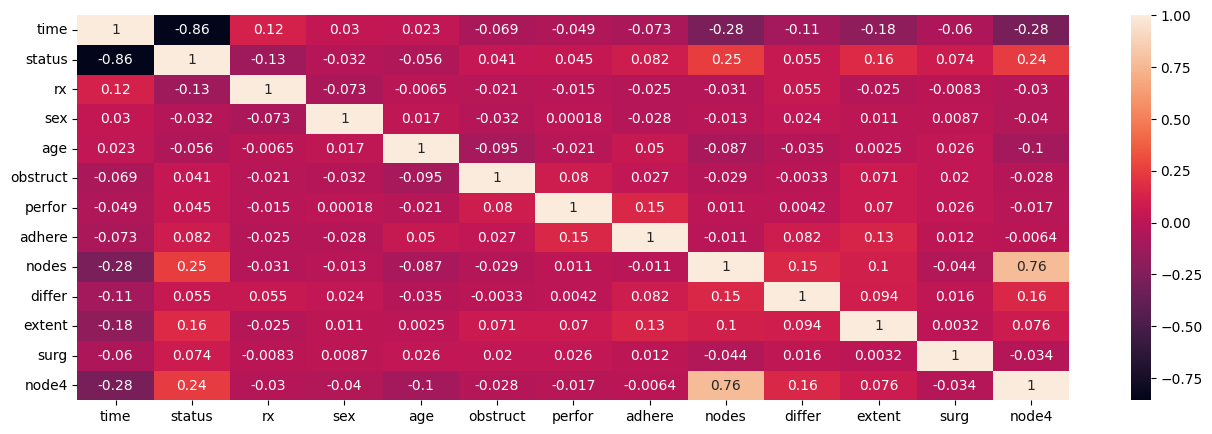

In [11]:
#correlation analysis
correlation=df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

* In the correlation matrix , value closer to 1 indicates more dependance of one column on other , negative value indicatese inverse relation.
* We can see the coefficient of nodes and node4 is 0.76 which is justified as if there are more number of nodes then nodes greater than 4 will be true.
* Other coefficients do not give much insight of the data.

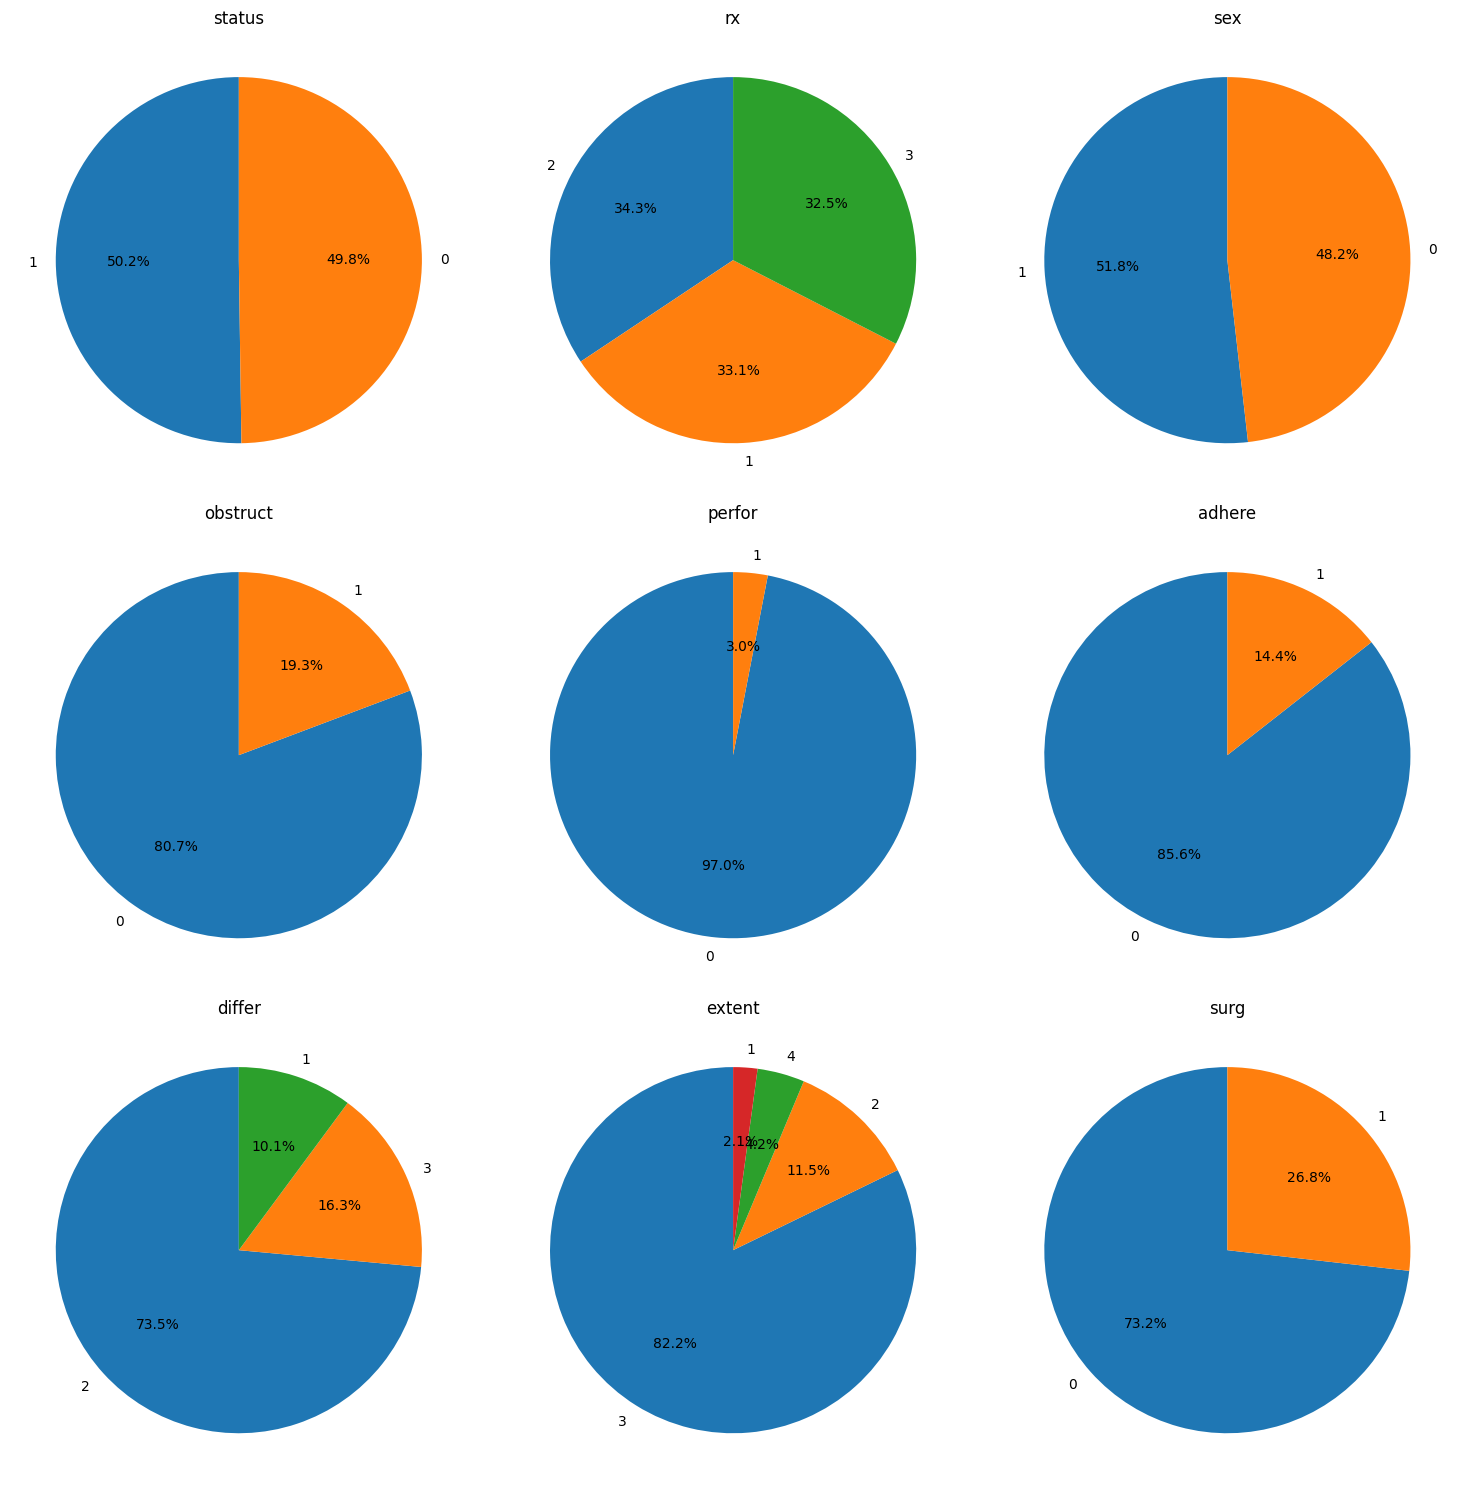

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = 3
cols=['status', 'rx', 'sex', 'obstruct', 'perfor', 'adhere', 'differ', 'extent', 'surg', 'node4']
num_rows=3
# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

# Loop through each feature (starting from the second column) and plot a pie chart in the grid
for i, label in enumerate(cols): 
    if i < len(axes): 
        values = df[label].value_counts()
        axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(label)
    else:
        break 


plt.tight_layout()

plt.show()


* From above pie charts we can see that half of the data is censored , therefore we cannot remove it and we have to make use of it in our ML models.
* In perfor pie chart we can see only 3 percent people had perforation in colon(very less variation).
* Other pie charts show the distribution of data in each column.


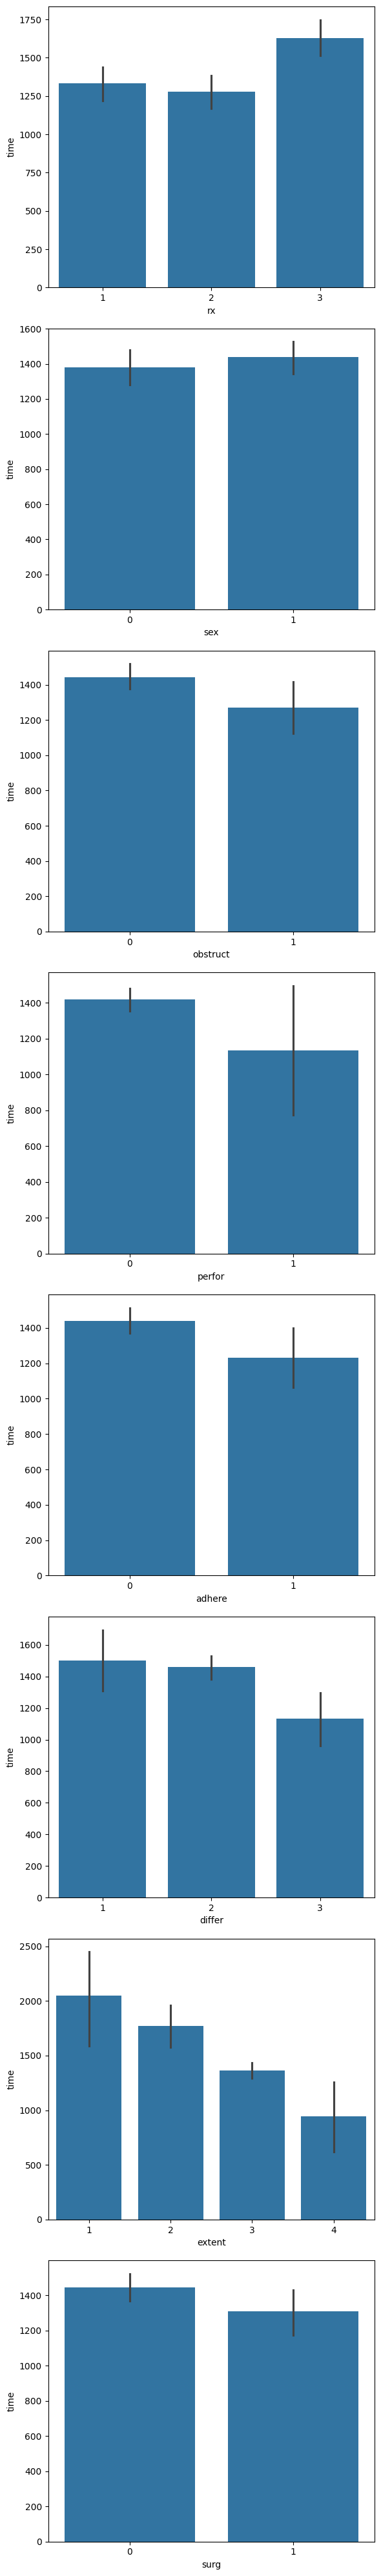

In [14]:
# Analyzing survival time by bar plots(remove the content when you want to see the grahps)
labels = ['rx', 'sex', 'obstruct', 'perfor', 'adhere', 'differ', 'extent', 'surg']
fig, axes = plt.subplots(nrows=len(labels), figsize=(6, 40))
for i, label in enumerate(labels):
    sns.barplot(x=label, y='time', data=df, ax=axes[i])
    axes[i].set_xlabel(label)

plt.tight_layout()
plt.show()

* From the above analysis we can see that on an average where features are more critical , the survival time is lesser
* For example as we can see in the extent v/s time plot , as extent is increasing average survival time is decreasing

### Splitting data into training and testing data-sets

In [15]:
from sklearn.preprocessing import MinMaxScaler
data_y = df.loc[:, ['time', 'status']].copy()

#status is basically censorship status so renaming the column to make it more meaningful
data_y = data_y.rename(columns={'status': 'cens'})
data_x = df.drop(['time', 'status'], axis=1)

#Normalising data using min-max scaling method
scaler = MinMaxScaler()
data_x_transformed= scaler.fit_transform(data_x)
data_x_transformed=pd.DataFrame(data_x_transformed,columns=['rx', 'sex', 'age', 'obstruct', 'perfor', 'adhere', 'nodes', 'differ','extent', 'surg', 'node4'])

#Train test split
X_train, X_test, y_train, y_test = train_test_split(data_x_transformed, data_y, test_size=0.2, random_state=1)


#Swapping the values as it is required to give input in a specific way to the estimators
list_of_tuples = list(y_train.itertuples(index=False, name=None))
swapped_list = [(t[1], t[0]) for t in list_of_tuples]
y_train = np.array(swapped_list, dtype=[('cens', bool), ('time', float)])
list_of_tuples = list(y_test.itertuples(index=False, name=None))
swapped_list = [(t[1], t[0]) for t in list_of_tuples]
y_test = np.array(swapped_list, dtype=[('cens', bool), ('time', float)])


### Models

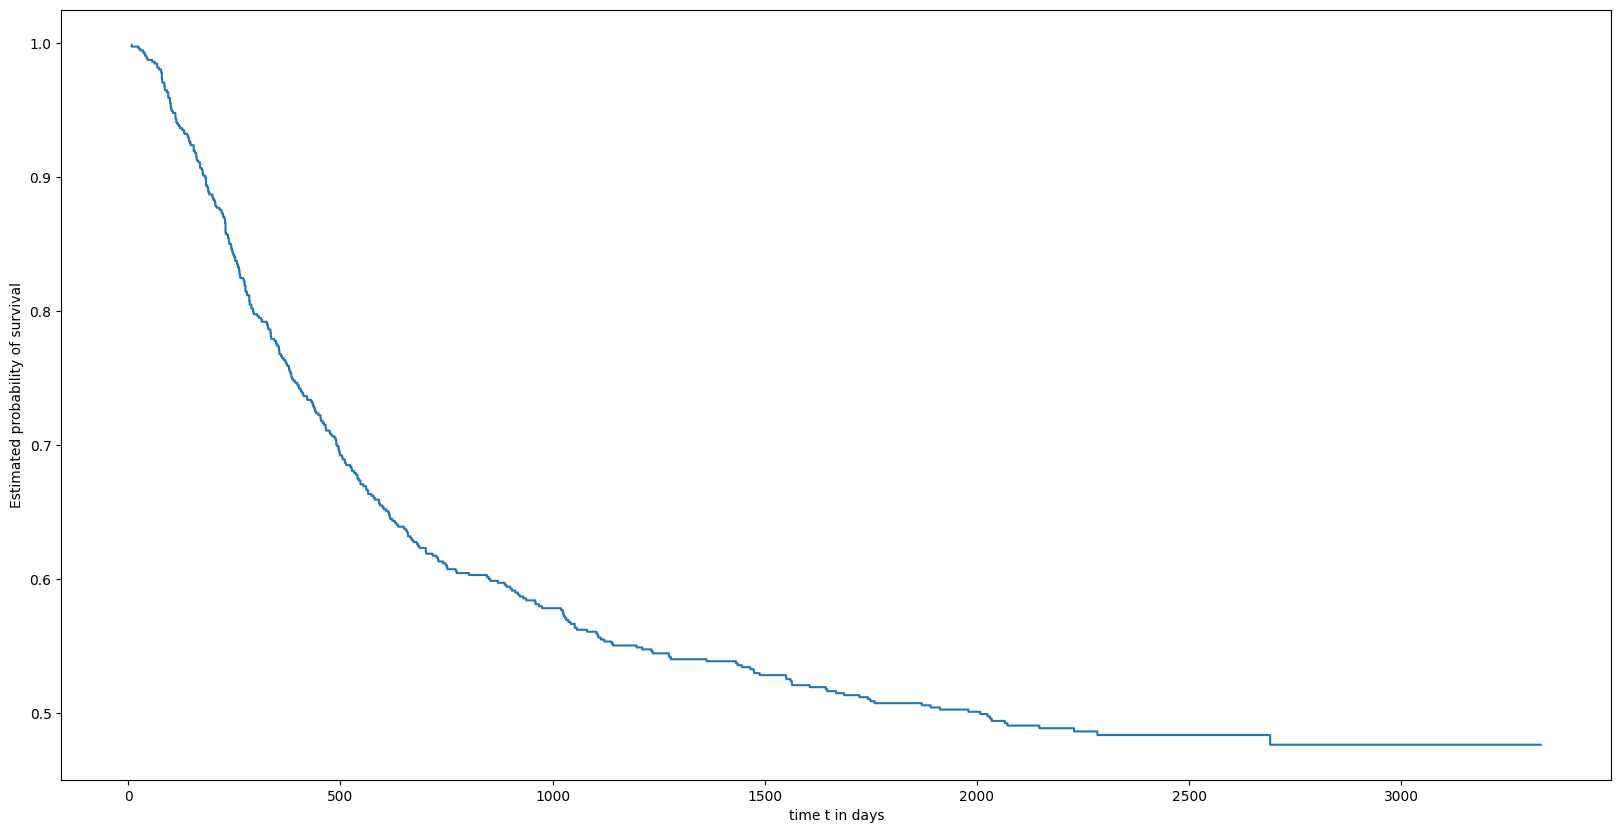

In [16]:
# Kaplan meier estimator
time, survival_prob, conf_int = kaplan_meier_estimator(y_train["cens"], y_train["time"], conf_type="log-log")
plt.figure(figsize=(20,10))
plt.step(time, survival_prob)
plt.ylabel("Estimated probability of survival")
plt.xlabel("time t in days")
plt.show()

In [17]:
##cox proportional hazard model (Basic cox)
cox_ph_estimator = CoxPHSurvivalAnalysis()
cox_ph_estimator.fit(X_train, y_train)
pd.Series(cox_ph_estimator.coef_, index=X_train.columns)

rx         -0.426004
sex        -0.215822
age        -0.156815
obstruct    0.214183
perfor      0.271151
adhere     -0.018745
nodes       0.966763
differ      0.368067
extent      1.202198
surg        0.241199
node4       0.731533
dtype: float64

In [18]:
from sksurv.metrics import concordance_index_censored


#Training different variations of cox proportional hazard model


coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(X_train, y_train)



coxnet_model = CoxnetSurvivalAnalysis()
coxnet_model.fit(X_train, y_train)


coxlasso_model = CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, n_alphas=100)
coxlasso_model.fit(X_train, y_train)


coxridge_model = CoxnetSurvivalAnalysis(l1_ratio=0.99)
coxridge_model.fit(X_train, y_train)


coxph_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxph_model.predict(X_test))
coxnet_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxnet_model.predict(X_test))
coxlasso_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxlasso_model.predict(X_test))
coxridge_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxridge_model.predict(X_test))

print(f'CoxPH C-index: {coxph_cindex[0]:.3f}')
print(f'CoxNet C-index: {coxnet_cindex[0]:.3f}')
print(f'CoxLasso C-index: {coxlasso_cindex[0]:.3f}')
print(f'CoxRidge C-index: {coxridge_cindex[0]:.3f}')


CoxPH C-index: 0.618
CoxNet C-index: 0.618
CoxLasso C-index: 0.619
CoxRidge C-index: 0.620


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
coxnet_pipe = make_pipeline(StandardScaler(),CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100))
coxnet_pipe.fit(X_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py:427: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100).
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [21]:
from sklearn.model_selection import GridSearchCV, KFold
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(),CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1,
).fit(X_train, y_train)

cv_results = pd.DataFrame(gcv.cv_results_)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py:427: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py:427: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py:427: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py:427: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


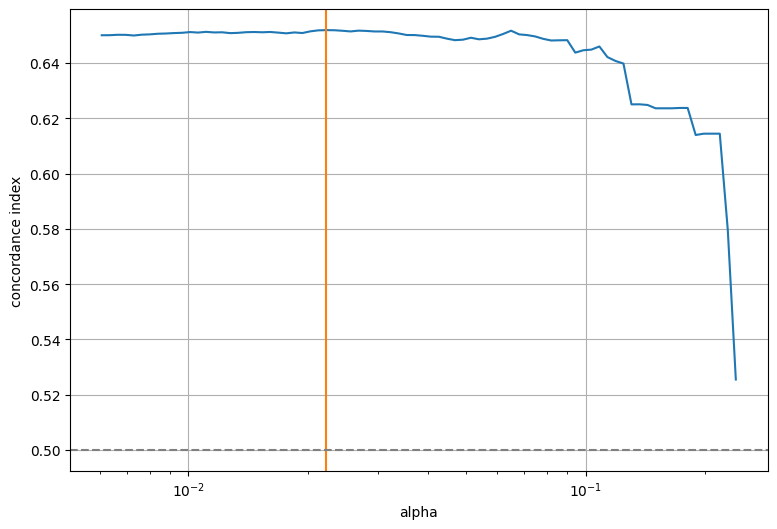

In [22]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 9


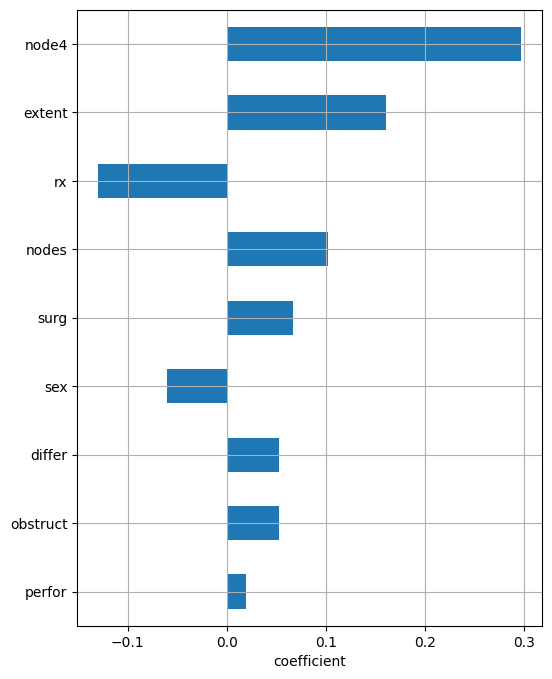

In [23]:
#Doing more coefficient analysis(To see which coefficient affects the survival probability more)
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(best_model.coef_, index=X_train.columns, columns=["coefficient"])

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [30]:
# X_train_1=X_train.drop(["perfor","obstruct","differ","sex"],axis=1)
# X_test_1=X_test.drop(["perfor","obstruct","differ","sex"],axis=1)

In [24]:
#Removing features from X_train to make X_train_1
data_x_1=data_x.drop(["perfor","obstruct","differ","sex"],axis=1)
scaler = MinMaxScaler()
data_x_transformed_1= scaler.fit_transform(data_x_1)
data_x_transformed_1=pd.DataFrame(data_x_transformed_1,columns=['rx', 'age', 'adhere', 'nodes','extent', 'surg', 'node4'])
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_x_transformed_1, data_y, test_size=0.2, random_state=1)


In [25]:

coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(X_train_1, y_train)


coxnet_model = CoxnetSurvivalAnalysis()
coxnet_model.fit(X_train_1, y_train)


coxlasso_model = CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, n_alphas=100,fit_baseline_model=True)
coxlasso_model.fit(X_train_1, y_train)


coxridge_model = CoxnetSurvivalAnalysis(l1_ratio=0.99)
coxridge_model.fit(X_train_1, y_train)


coxph_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxph_model.predict(X_test_1))
coxnet_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxnet_model.predict(X_test_1))
coxlasso_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxlasso_model.predict(X_test_1))
coxridge_cindex = concordance_index_censored(y_test["cens"], y_test["time"], coxridge_model.predict(X_test_1))


print(f'CoxPH C-index: {coxph_cindex[0]:.3f}')
print(f'CoxNet C-index: {coxnet_cindex[0]:.3f}')
print(f'CoxLasso C-index: {coxlasso_cindex[0]:.3f}')
print(f'CoxRidge C-index: {coxridge_cindex[0]:.3f}')


CoxPH C-index: 0.658
CoxNet C-index: 0.659
CoxLasso C-index: 0.660
CoxRidge C-index: 0.659


In [26]:
coxnet_pred = make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9, fit_baseline_model=True))
coxnet_pred.set_params(**gcv.best_params_)
coxnet_pred.fit(X_train_1, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alphas=[0.022272562329423755],
                                        fit_baseline_model=True,
                                        l1_ratio=0.9))])

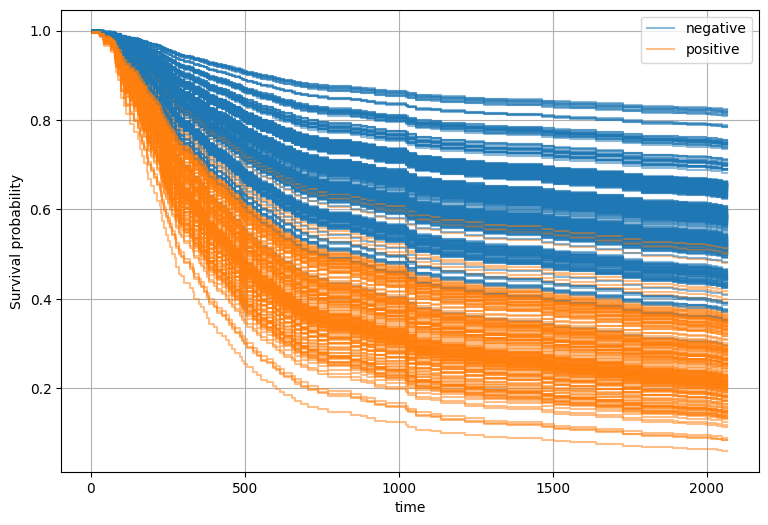

In [27]:
surv_fns = coxlasso_model.predict_survival_function(X_train_1)
time_points = np.quantile(y_train["time"], np.linspace(0, 0.6, 100))

legend_handles = []
legend_labels = []

_, ax = plt.subplots(figsize=(9, 6))
for fn, label in zip(surv_fns, X_train.loc[:, "node4"].astype(int)):
    (line,) = ax.step(time_points, fn(time_points), where="post", color=f"C{label}", alpha=0.5)
    if len(legend_handles) <= label:
        name = "positive" if label == 1 else "negative"
        legend_labels.append(name)
        legend_handles.append(line)

ax.legend(legend_handles, legend_labels)
ax.set_xlabel("time")
ax.set_ylabel("Survival probability")
ax.grid(True)

#### Random Forest

In [28]:
from sksurv.ensemble import RandomSurvivalForest

In [29]:
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           n_jobs=-1,
                           random_state=42)
rsf.fit(X_train_1, y_train)
rsf.score(X_test_1,y_test)

0.6181503889369058

In [140]:
# from sksurv.ensemble import RandomSurvivalForest
# from sklearn.model_selection import GridSearchCV
# from sksurv.util import Surv
# from sksurv.metrics import concordance_index_censored

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'random_state': [42],  # Set a specific random state for reproducibility
# }

# # Create the RSF model
# rsf = RandomSurvivalForest()

# # Set up GridSearchCV
# grid_search = GridSearchCV(rsf, param_grid, cv=5, n_jobs=1)
# grid_search.fit(X_train_1, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Evaluate the model on the validation set or test set
# validation_score = grid_search.score(X_test_1, y_test)

# print("Best Hyperparameters:", best_params)
# print("Concordance Index:", validation_score)



#Commented because it takes time to run, output of this cell was:
# Best Hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 0}
# Concordance Index: 0.6306395851339671


In [30]:
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=1,
                           max_features="sqrt",
                           max_depth=5,
                           bootstrap=True,
                           n_jobs=-1,
                           random_state=0)
rsf.fit(X_train_1, y_train)
rsf.score(X_test_1,y_test)

0.6306395851339671

In [31]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train_1, y_train)
cindex = est_cph_tree.score(X_test_1, y_test)
cindex

0.6437337942955921

In [144]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2,1],
#     'max_depth': [1,3, 5, 7],
#     'min_samples_leaf': [0,1, 2, 4],
#     'random_state': [0,42],
# }

# gb_model = GradientBoostingSurvivalAnalysis()

# # Set up GridSearchCV
# grid_search = GridSearchCV(gb_model, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Evaluate the model on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Hyperparameters:", best_params)
# print("Concordance Index:", test_score)

#Another hyperparameter tuning , best results are used in above model

In [32]:
import torch
# ! pip install torchtuples
import torchtuples as tt
# ! pip install pycox
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [33]:
#Transforming data so that deep learning model can be trained on it
data_y_transform_train = pd.DataFrame.from_records(y_train, columns=['event', 'time'])
data_y_transform_test = pd.DataFrame.from_records(y_test, columns=['event', 'time'])
data_y_transform_train['cens'] = data_y_transform_train['cens'].replace({True: 1, False: 0})
data_y_transform_test['cens'] = data_y_transform_test['cens'].replace({True: 1, False: 0})
X_train_1 = X_train_1.astype('float32')
X_test_1 = X_test_1.astype('float32')
X_train_values= X_train_1.values
X_test_values= X_test_1.values


In [34]:
from pycox.models import DeepHitSingle

In [35]:
num_durations = 10
labtrans = DeepHitSingle.label_transform(num_durations)
get_target = lambda df: (df['time'].values, df['cens'].values)
y_train_deephit = labtrans.fit_transform(*get_target(data_y_transform_train))
durations_test, events_test = get_target(data_y_transform_test)

In [36]:
in_features = X_train_1.shape[1]
out_features = labtrans.out_features
num_nodes = [16]
batch_norm = True
dropout = 0.2
net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)
optimizer = tt.optim.AdamWR(decoupled_weight_decay=0.01, cycle_eta_multiplier=0.8,
                            cycle_multiplier=2)
model_deep_hit = DeepHitSingle(net, optimizer, alpha = 0.2, sigma = 0.1, duration_index=labtrans.cuts)
epochs = 10
batch_size=8 
model_deep_hit.fit(X_train_values, y_train_deephit, batch_size, epochs)
surv = model_deep_hit.predict_surv_df(X_test_values)
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')
ev.concordance_td('antolini')

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\torchtuples\callbacks.py:607: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1519.)
  p.data = p.data.add(-weight_decay * eta, p.data)


0:	[0s / 0s],		train_loss: 0.6078
1:	[0s / 0s],		train_loss: 0.5868
2:	[0s / 1s],		train_loss: 0.5772
3:	[0s / 1s],		train_loss: 0.5546
4:	[0s / 2s],		train_loss: 0.5596
5:	[0s / 2s],		train_loss: 0.5517
6:	[0s / 2s],		train_loss: 0.5497
7:	[0s / 3s],		train_loss: 0.5454
8:	[0s / 3s],		train_loss: 0.5505
9:	[0s / 4s],		train_loss: 0.5523


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pycox\evaluation\eval_surv.py:36: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  assert pd.Series(self.index_surv).is_monotonic


0.5713050993949871

In [37]:
def deep_hit_train(num_nodes, dropout, learning_rate, alpha, sigma, epochs, batch_size):
    concordance_indexes = []

    in_features = X_train_1.shape[1]
    out_features = labtrans.out_features
    batch_norm=True

    net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)
    optimizer = tt.optim.AdamWR(decoupled_weight_decay=0.01, cycle_eta_multiplier=0.8, cycle_multiplier=2)
    model_deep_hit = DeepHitSingle(net, optimizer, alpha=alpha, sigma=sigma, duration_index=labtrans.cuts)

    model_deep_hit.fit(X_train_values, y_train_deephit, batch_size, epochs,verbose=False)

    surv = model_deep_hit.predict_surv_df(X_test_values)
    ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')
    concordance_index = ev.concordance_td('antolini')

    return concordance_index


In [151]:
# # Lists of hyperparameters
# num_nodes = [16, 32, 64]
# dropout = [0.1, 0.2, 0.3]
# learning_rate = [1e-4, 1e-3, 1e-2]
# alpha = [0.1, 0.2, 0.5]
# sigma = [0.05, 0.1, 0.2]
# epochs = [30, 40, 50]
# batch_size = [16, 32, 64]


# results = []

# import warnings
# # Ignore the specified FutureWarning
# warnings.filterwarnings("ignore", category=FutureWarning, module="pycox.evaluation.eval_surv")


# for nodes in num_nodes:
#     for drop in dropout:
#         for lr in learning_rate:
#             for a in alpha:
#                 for s in sigma:
#                     for epoch in epochs:
#                         for bs in batch_size:
#                             # Call your function with current hyperparameters
#                             result = deep_hit_train(num_nodes=nodes, dropout=drop,
#                                                    learning_rate=lr, alpha=a, sigma=s, epochs=epoch, batch_size=bs)


#                             results.append({
#                                 'num_nodes': nodes,
#                                 'dropout': drop,
#                                 'learning_rate': lr,
#                                 'alpha': a,
#                                 'sigma': s,
#                                 'epochs': epoch,
#                                 'batch_size': bs,
#                                 'concordance_index': result
#                             })

# best_result = max(results, key=lambda x: x['concordance_index'])

# print("Best Hyperparameters:")
# print(best_result)


Best Hyperparameters:
{'num_nodes': 32, 'dropout': 0.2, 'learning_rate': 0.001, 'alpha': 0.1, 'sigma': 0.1, 'epochs': 30, 'batch_size': 16, 'concordance_index': 0.6716508210890233}


In [41]:
# training DL model for survival analysis
# in_features = X_train_1.shape[1]
# out_features = labtrans.out_features
# num_nodes = [32]
# batch_norm = True
# dropout = 0.2
# net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)
# optimizer = tt.optim.AdamWR(decoupled_weight_decay=0.01, cycle_eta_multiplier=0.8,
#                             cycle_multiplier=2)
# model_deep_hit = DeepHitSingle(net, optimizer, alpha = 0.2, sigma = 0.1, duration_index=labtrans.cuts)
# epochs = 30
# batch_size=16 
# model_deep_hit.fit(X_train_values, y_train_deephit, batch_size, epochs,shuffle=False)
# surv = model_deep_hit.predict_surv_df(X_test_values)
# ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')
# ev.concordance_td('antolini')


In [39]:
#Predicting the survival probability from some input data
x_new = pd.DataFrame.from_dict(
    {
        1:[ 2, 50,  0,  2,  1,  0,  0],
        2:[ 3, 56,  1,  7,  3,  1,  1]
    },
    columns=X_train_1.columns,
    orient="index",
)

x_new=scaler.transform(x_new)
x_new=pd.DataFrame(x_new,columns=['rx', 'age', 'adhere', 'nodes','extent', 'surg', 'node4'])

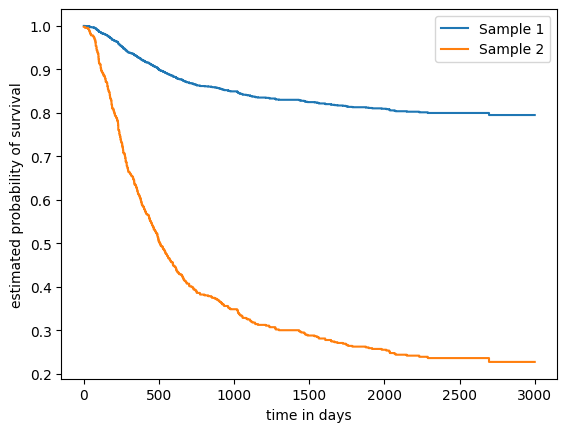

In [40]:
pred_surv = coxph_model.predict_survival_function(x_new)
time_points = np.arange(1, 3000)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post", label=f"Sample {i + 1}")
plt.ylabel("estimated probability of survival")
plt.xlabel("time in days")
plt.legend()